In [1]:
import numpy as np
from numpy.core.numeric import True_
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

import sys
sys.path.insert(0,'..')
import get_cup_dataset as dt
from SVR import SVR

In [2]:
six = {}
seven = {}
fifteen = {}
sixteen = {}
seventeen = {}

with open("..\gs_models\gs_linear_6", "rb") as f:
    six = pickle.load(f)['model']
with open("..\gs_models\gs_linear_7", "rb") as f:
    seven = pickle.load(f)['model']
with open("..\gs_models\gs_linear_15", "rb") as f:
    fifteen = pickle.load(f)['model']
with open("..\gs_models\gs_linear_16", "rb") as f:
    sixteen = pickle.load(f)['model']
with open("..\gs_models\gs_linear_17", "rb") as f:
    seventeen = pickle.load(f)['model']

In [3]:
def plot_single_model(cup_model, fstar, axs, color, label):
    plot_conv_rate = []
    residual_error = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
        plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
        residual_error.append(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar))
    axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=color)
    axs[0].set_ylabel("CONV_RATE")
    axs[1].plot(range(len(log_residual_error)), log_residual_error, label=label, color=color)
    axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[2].plot(range(len(residual_error)), residual_error, label=label, color=color)
    axs[2].set_ylabel("RESIDUAL_ERROR")

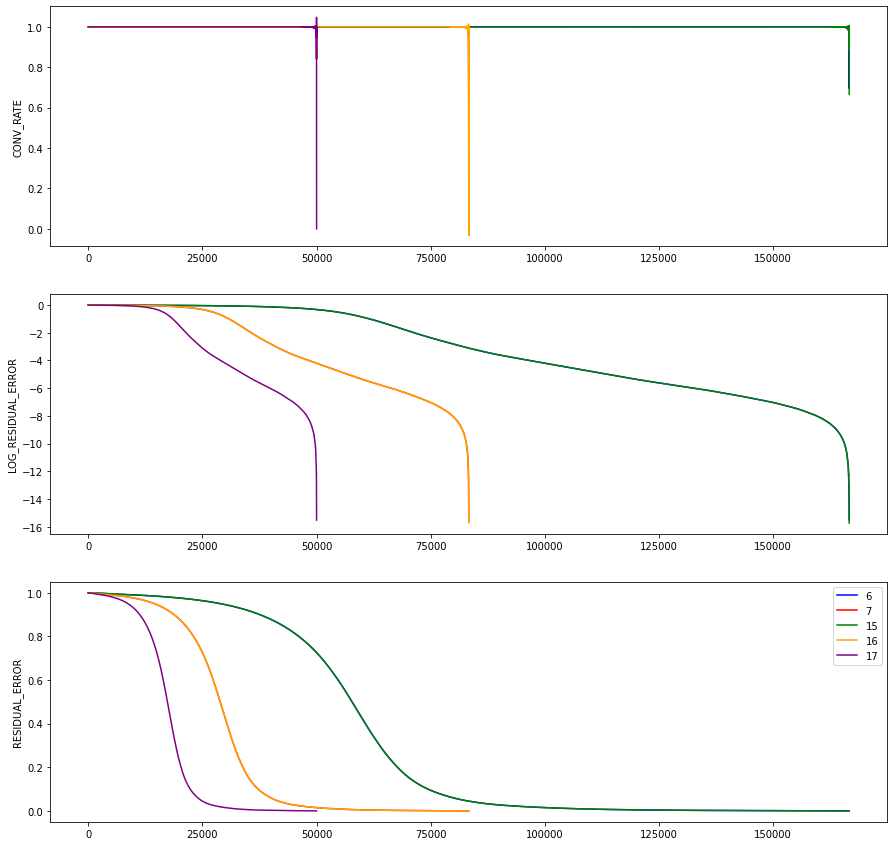

In [4]:
fstar = seventeen.history['fstar']
fig, axs = plt.subplots(3, figsize=(15,15))
colors = ['blue', 'red', 'green', 'orange', 'purple']
plot_single_model(six, fstar, axs, colors[0], '6')
plot_single_model(seven, fstar, axs, colors[1], '7')
plot_single_model(fifteen, fstar, axs, colors[2], '15')
plot_single_model(sixteen, fstar, axs, colors[3], '16')
plot_single_model(seventeen, fstar, axs, colors[4], '17')
plt.legend()
plt.show()

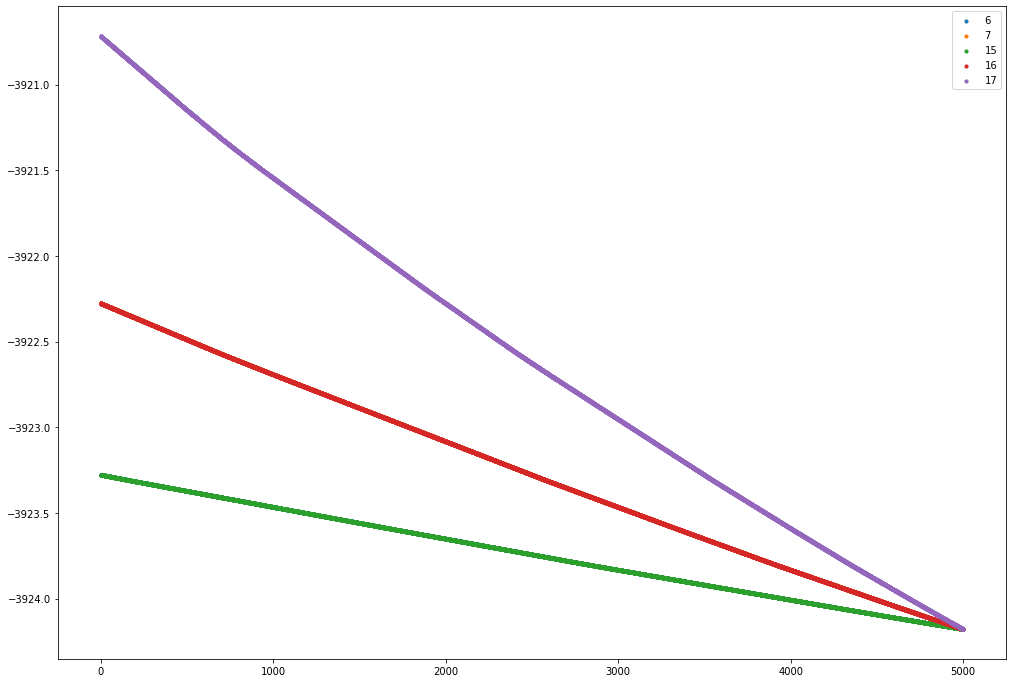

In [42]:
len_plot = 5000
scatter_size = 10
fig, ax = plt.subplots(figsize=(17,12))
plt.scatter(range(len_plot), six.history['f'][-len_plot:], label='6', s=scatter_size)
plt.scatter(range(len_plot), seven.history['f'][-len_plot:], label='7', s=scatter_size)
plt.scatter(range(len_plot), fifteen.history['f'][-len_plot:], label='15', s=scatter_size)
plt.scatter(range(len_plot), sixteen.history['f'][-len_plot:], label='16', s=scatter_size)
plt.scatter(range(len_plot), seventeen.history['f'][-len_plot:], label='17', s=scatter_size)
plt.legend()
plt.show()